### Unsupervised Machine Learning with Scikit-learn


#### Types of ML

![](ml_types2.png)

+ Source: tdsc


Unsupervised ML:  use of unlabeled data for training 
+ The systems tries to learn without a teacher
+ You are not given a target value/label that you are to predict the outcome as
+ We only have the independent variables(x) and no target/dependent variable(y) in these problems.


#### Libraries
+ pandas
+ scikit-learn
+ pycaret
+ hdbscan

#### Types of UML Algorithms
+ Clustering
+ Anomaly Detection:outlier detection
+ Novelty Detection:
+ Visualization
+ Dimensionality Reduction:simplify data without losing too much info by merging correlated features into one
+ Association Rule Learning:discovering interesting relations btwn attributes

    
#### Clustering Unsupervised ML Task
+ Clustering:
    - The process of grouping dataset in to groups in such a way that similar datapoints are in the same group
    - Usefulness
        - EDA
        - Pattern Recognition
        - Image Analysis
        + For working with unlabelled data
        + Search engines image search
        + Customer segmentation
        + Market segmentation
        + Outlier Detection
        + clustering similar documents together, 
        + recommending similar songs or movies,


#### Types of Clustering
+ Flat vs Hierarchical
+ Centroid Based vs Density Based


![](mlclassifiers.png)


#### Basic Principle Behind Clustering
All are based on different distance measures. 
 
 + K-Means (distance between points), 
 + Affinity propagation (graph distance), 
 + Mean-shift (distance between points), 
 + DBSCAN (distance between nearest points), 
 + Gaussian mixtures (Mahalanobis distance to centers), 
 + Spectral clustering (graph distance), etc.

#### Terms
+ Centroid: a data point at the center of a group/cluster


#### Data Source
+ https://archive.ics.uci.edu/ml/datasets
    

### Clustering using KMeans Algorithm
+ Kmeans(Lloyd Forgy Algorithm)
+ MiniBatchKmeans

#### Benefits
+ Fast and Scalable


#### Demerits
+ Need to know th number of clusters
+ problem of having to pre-define the number of clusters.
    - Elbow Method/Silhoutte Method
    - Hierarchical Clustering:
+ Varying sizes and different densities may affect performance
    - scaling


#### Terms
+ k = number of clusters
+ .label_: index of cluster 
+ .cluster_centers_: centroid
+ .inertia_: performance metric of mean sq distance btwn each instance and its closest centroid
+ .score:



#### Task
+ Segment Countries into their respective Continents
+ Unsupervised ML 
+ https://developers.google.com/public-data/docs/canonical/countries_csv

In [66]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Task 2
+ Find the different clusters
+ Customer segmentation
    - Different types of customer/buyers in a market

In [8]:
# Load Dataset
df = pd.read_csv("countries_geodata.csv",sep='\t')

In [9]:
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [10]:
# Save to CSV
df.to_csv("countries_data.csv")

In [11]:
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [12]:
# Check For Dtypes
df.dtypes

country       object
latitude     float64
longitude    float64
name          object
dtype: object

In [13]:
# Check For Missing NAN
df.isnull().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [14]:
# Drop Na
df = df.dropna()

In [15]:
df.isnull().sum()

country      0
latitude     0
longitude    0
name         0
dtype: int64

In [16]:
# Columns Consistency
df.columns

Index(['country', 'latitude', 'longitude', 'name'], dtype='object')

In [18]:
# Check For Countries
df.shape

(243, 4)

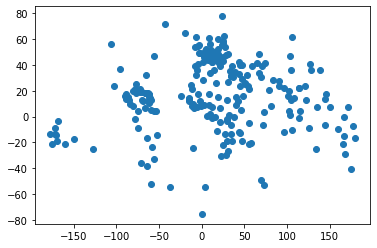

In [19]:
# Plot of our Countries 
plt.scatter(df['longitude'],df['latitude'])

### Working with Kmeans

In [20]:
from sklearn.cluster import KMeans

In [22]:
# By Assumation we have 7 continents
# k = 7
km = KMeans(n_clusters=7)


In [24]:
# Prep
xfeatures = df[['longitude','latitude']]

In [25]:
# Fit n Predict
clusters = km.fit_predict(xfeatures)

In [26]:
# Get all the Labels(Clusters)
km.labels_

array([6, 2, 2, 0, 0, 6, 2, 0, 4, 4, 0, 3, 6, 5, 0, 2, 6, 0, 1, 6, 4, 6,
       2, 4, 4, 0, 1, 0, 0, 0, 1, 4, 4, 6, 0, 0, 1, 4, 4, 4, 6, 4, 3, 0,
       4, 1, 0, 0, 0, 6, 1, 2, 6, 6, 2, 6, 0, 0, 6, 0, 6, 2, 6, 2, 6, 2,
       6, 5, 0, 5, 6, 6, 4, 6, 0, 2, 0, 6, 4, 6, 6, 6, 4, 0, 4, 6, 4, 0,
       5, 6, 0, 2, 1, 4, 0, 6, 0, 6, 1, 6, 2, 6, 1, 1, 2, 2, 6, 6, 6, 0,
       2, 1, 4, 2, 1, 3, 4, 0, 1, 1, 2, 0, 2, 1, 2, 0, 6, 1, 4, 4, 6, 6,
       6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 1, 1, 1, 5, 0, 6, 0, 6, 4, 1, 4, 0,
       1, 4, 5, 6, 5, 4, 0, 6, 6, 1, 5, 3, 5, 2, 0, 0, 3, 5, 1, 2, 6, 0,
       3, 0, 2, 6, 5, 0, 2, 4, 6, 6, 1, 4, 2, 5, 2, 2, 6, 1, 4, 6, 6, 6,
       4, 6, 6, 2, 0, 4, 0, 2, 4, 0, 4, 4, 4, 1, 2, 3, 5, 2, 6, 3, 2, 0,
       5, 1, 4, 6, 4, 0, 0, 2, 6, 0, 0, 0, 0, 1, 5, 3, 3, 6, 2, 4, 4, 4,
       4], dtype=int32)

In [27]:
clusters

array([6, 2, 2, 0, 0, 6, 2, 0, 4, 4, 0, 3, 6, 5, 0, 2, 6, 0, 1, 6, 4, 6,
       2, 4, 4, 0, 1, 0, 0, 0, 1, 4, 4, 6, 0, 0, 1, 4, 4, 4, 6, 4, 3, 0,
       4, 1, 0, 0, 0, 6, 1, 2, 6, 6, 2, 6, 0, 0, 6, 0, 6, 2, 6, 2, 6, 2,
       6, 5, 0, 5, 6, 6, 4, 6, 0, 2, 0, 6, 4, 6, 6, 6, 4, 0, 4, 6, 4, 0,
       5, 6, 0, 2, 1, 4, 0, 6, 0, 6, 1, 6, 2, 6, 1, 1, 2, 2, 6, 6, 6, 0,
       2, 1, 4, 2, 1, 3, 4, 0, 1, 1, 2, 0, 2, 1, 2, 0, 6, 1, 4, 4, 6, 6,
       6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 1, 1, 1, 5, 0, 6, 0, 6, 4, 1, 4, 0,
       1, 4, 5, 6, 5, 4, 0, 6, 6, 1, 5, 3, 5, 2, 0, 0, 3, 5, 1, 2, 6, 0,
       3, 0, 2, 6, 5, 0, 2, 4, 6, 6, 1, 4, 2, 5, 2, 2, 6, 1, 4, 6, 6, 6,
       4, 6, 6, 2, 0, 4, 0, 2, 4, 0, 4, 4, 4, 1, 2, 3, 5, 2, 6, 3, 2, 0,
       5, 1, 4, 6, 4, 0, 0, 2, 6, 0, 0, 0, 0, 1, 5, 3, 3, 6, 2, 4, 4, 4,
       4], dtype=int32)

In [30]:
# Check if predicted clusters is the same as our labels
clusters is km.labels_

True

In [31]:
# Centroid/Center
km.cluster_centers_

array([[ -70.34407094,    9.8465647 ],
       [ 103.45510325,   18.34838525],
       [  47.93853438,   28.52611853],
       [-164.167216  ,  -15.7990057 ],
       [  20.38957626,  -11.53326343],
       [ 156.84523619,   -7.98094281],
       [   7.80604397,   44.17186475]])

In [32]:
# Store and Map
df['cluster_continents'] = clusters

In [33]:
df.head()

,country,latitude,longitude,name,cluster_continents
0,AD,42.546245,1.601554,Andorra,6
1,AE,23.424076,53.847818,United Arab Emirates,2
2,AF,33.939110,67.709953,Afghanistan,2
3,AG,17.060816,-61.796428,Antigua and Barbuda,0
4,AI,18.220554,-63.068615,Anguilla,0


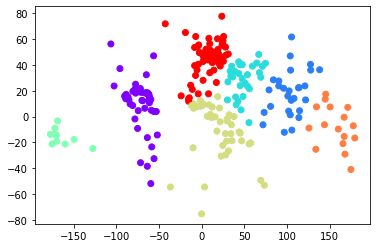

In [34]:
# Plot of our clusters
plt.scatter(df['longitude'],df['latitude'],c=df['cluster_continents'],cmap='rainbow')

In [36]:
# Map our scatter plot over worldmap
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

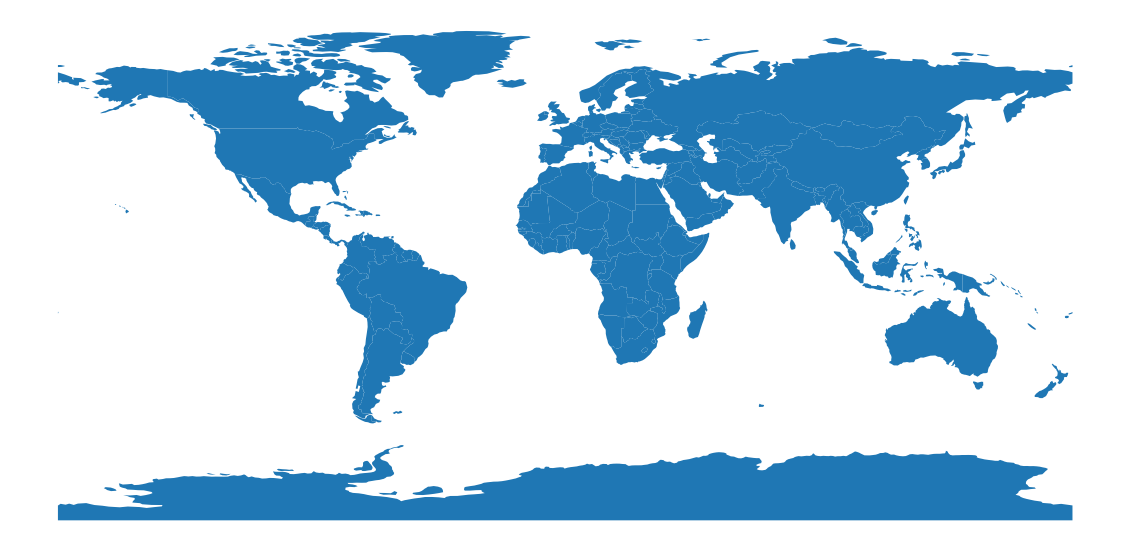

In [38]:
# World Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

In [39]:
# Overlap our clusters
g01 = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['longitude'],df['latitude']))

In [40]:
g01

,country,latitude,longitude,name,cluster_continents,geometry
0,AD,42.546245,1.601554,Andorra,6,POINT (1.60155 42.54624)
1,AE,23.424076,53.847818,United Arab Emirates,2,POINT (53.84782 23.42408)
2,AF,33.939110,67.709953,Afghanistan,2,POINT (67.70995 33.93911)
3,AG,17.060816,-61.796428,Antigua and Barbuda,0,POINT (-61.79643 17.06082)
4,AI,18.220554,-63.068615,Anguilla,0,POINT (-63.06862 18.22055)
...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,2,POINT (48.51639 15.55273)
241,YT,-12.827500,45.166244,Mayotte,4,POINT (45.16624 -12.82750)
242,ZA,-30.559482,22.937506,South Africa,4,POINT (22.93751 -30.55948)
243,ZM,-13.133897,27.849332,Zambia,4,POINT (27.84933 -13.13390)


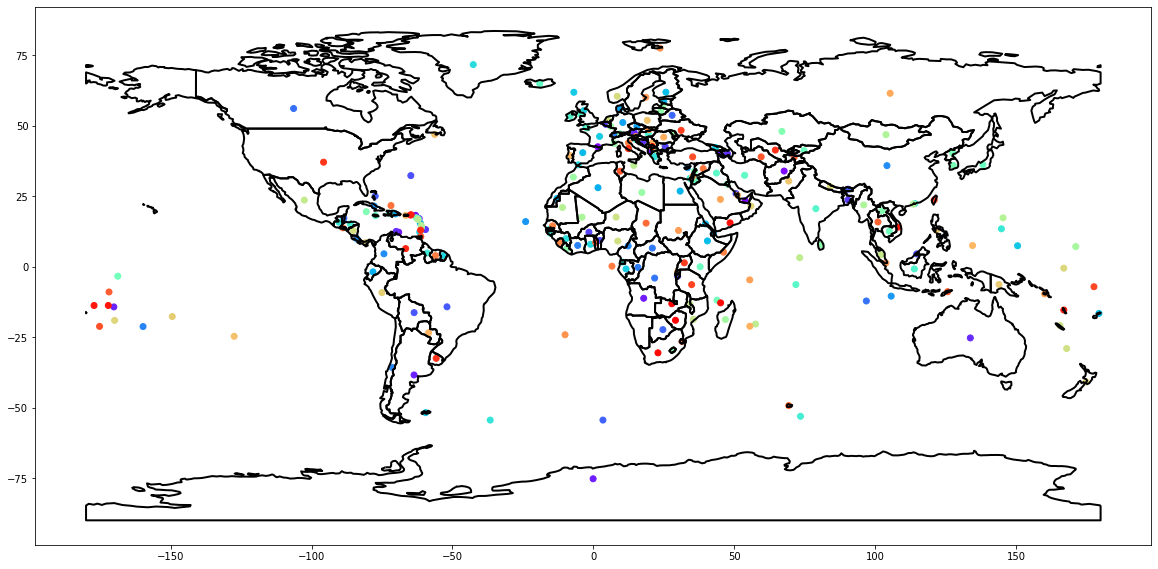

In [41]:
fig,ax = plt.subplots(figsize=(20,10))
g01.plot(cmap='rainbow',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

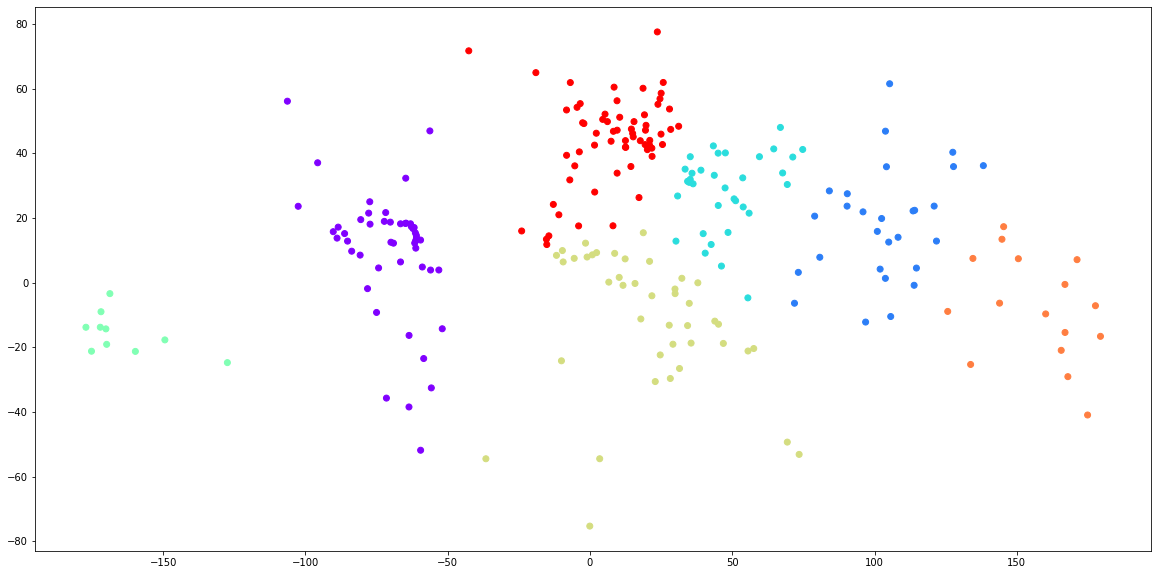

In [42]:
# Plot of our clusters
plt.figure(figsize=(20,10))
plt.scatter(df['longitude'],df['latitude'],c=df['cluster_continents'],cmap='rainbow')
plt.show()

In [44]:
df.head(20)

,country,latitude,longitude,name,cluster_continents,geometry
0,AD,42.546245,1.601554,Andorra,6,POINT (1.60155 42.54624)
1,AE,23.424076,53.847818,United Arab Emirates,2,POINT (53.84782 23.42408)
2,AF,33.939110,67.709953,Afghanistan,2,POINT (67.70995 33.93911)
3,AG,17.060816,-61.796428,Antigua and Barbuda,0,POINT (-61.79643 17.06082)
4,AI,18.220554,-63.068615,Anguilla,0,POINT (-63.06862 18.22055)
5,AL,41.153332,20.168331,Albania,6,POINT (20.16833 41.15333)
6,AM,40.069099,45.038189,Armenia,2,POINT (45.03819 40.06910)
7,AN,12.226079,-69.060087,Netherlands Antilles,0,POINT (-69.06009 12.22608)
8,AO,-11.202692,17.873887,Angola,4,POINT (17.87389 -11.20269)
9,AQ,-75.250973,-0.071389,Antarctica,4,POINT (-0.07139 -75.25097)


In [ ]:
continent_dict = {'South America':0,'North America':,'Asia':1,'Africa':4,'Australasia':5,'Europe':6}

In [53]:
df[df['cluster_continents'] == 3]

,country,latitude,longitude,name,cluster_continents,geometry
11,AS,-14.270972,-170.132217,American Samoa,3,POINT (-170.13222 -14.27097)
42,CK,-21.236736,-159.777671,Cook Islands,3,POINT (-159.77767 -21.23674)
115,KI,-3.370417,-168.734039,Kiribati,3,POINT (-168.73404 -3.37042)
166,NU,-19.054445,-169.867233,Niue,3,POINT (-169.86723 -19.05445)
171,PF,-17.679742,-149.406843,French Polynesia,3,POINT (-149.40684 -17.67974)
177,PN,-24.703615,-127.439308,Pitcairn Islands,3,POINT (-127.43931 -24.70361)
214,TK,-8.967363,-171.855881,Tokelau,3,POINT (-171.85588 -8.96736)
218,TO,-21.178986,-175.198242,Tonga,3,POINT (-175.19824 -21.17899)
237,WF,-13.768752,-177.156097,Wallis and Futuna,3,POINT (-177.15610 -13.76875)
238,WS,-13.759029,-172.104629,Samoa,3,POINT (-172.10463 -13.75903)


In [54]:
### Scale
from sklearn.preprocessing import StandardScaler

In [55]:
x_scaled = StandardScaler().fit_transform(xfeatures)

In [56]:
x_scaled

array([[-0.15777985,  0.9709565 ],
       [ 0.54848245,  0.26045005],
       [ 0.73587007,  0.65114838],
       [-1.0147905 ,  0.02401572],
       [-1.03198786,  0.06710714],
       [ 0.09320488,  0.9192012 ],
       [ 0.42939434,  0.87891526],
       [-1.11298027, -0.15562456],
       [ 0.06218871, -1.02614782],
       [-0.18039461, -3.40593626],
       [-1.03939646, -2.03729356],
       [-2.4792681 , -1.14015333],
       [ 0.01725755,  1.15562212],
       [ 1.62893581, -1.54899844],
       [-1.12525796, -0.14466234],
       [ 0.46371287,  0.88166504],
       [ 0.05955526,  1.02184711],
       [-0.98433145, -0.11966453],
       [ 1.04200264,  0.27014476],
       [-0.11900521,  1.26663195],
       [-0.20053911, -0.15516925],
       [ 0.16508656,  0.97792841],
       [ 0.50508921,  0.35357596],
       [ 0.22501238, -0.73522858],
       [-0.14812425, -0.2640607 ],
       [-1.05481636,  0.59103989],
       [ 1.37145313, -0.44138526],
       [-1.0390177 , -1.21517839],
       [-0.88135283,

In [57]:
xfeatures

,longitude,latitude
0,1.601554,42.546245
1,53.847818,23.424076
2,67.709953,33.939110
3,-61.796428,17.060816
4,-63.068615,18.220554
...,...,...
240,48.516388,15.552727
241,45.166244,-12.827500
242,22.937506,-30.559482
243,27.849332,-13.133897


In [58]:
km2 = KMeans(n_clusters=7)

In [59]:
new_clusters = km2.fit_predict(x_scaled)

In [60]:
df_scaled = df

In [61]:
df_scaled['cluster'] = new_clusters

In [62]:
df_scaled

,country,latitude,longitude,name,cluster_continents,geometry,cluster
0,AD,42.546245,1.601554,Andorra,6,POINT (1.60155 42.54624),3
1,AE,23.424076,53.847818,United Arab Emirates,2,POINT (53.84782 23.42408),1
2,AF,33.939110,67.709953,Afghanistan,2,POINT (67.70995 33.93911),1
3,AG,17.060816,-61.796428,Antigua and Barbuda,0,POINT (-61.79643 17.06082),0
4,AI,18.220554,-63.068615,Anguilla,0,POINT (-63.06862 18.22055),0
...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,2,POINT (48.51639 15.55273),2
241,YT,-12.827500,45.166244,Mayotte,4,POINT (45.16624 -12.82750),2
242,ZA,-30.559482,22.937506,South Africa,4,POINT (22.93751 -30.55948),6
243,ZM,-13.133897,27.849332,Zambia,4,POINT (27.84933 -13.13390),2


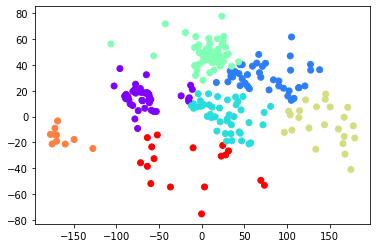

In [63]:
# Plot of our clusters
plt.scatter(df['longitude'],df['latitude'],c=df['cluster'],cmap='rainbow')

In [75]:
new_df = pd.DataFrame(x_scaled,columns=['longitude','latitude'])
new_df['name'] = df['name']
new_df['cluster'] = new_clusters

In [76]:
new_df.head()

,longitude,latitude,name,cluster
0,-0.157780,0.970957,Andorra,3
1,0.548482,0.260450,United Arab Emirates,1
2,0.735870,0.651148,Afghanistan,1
3,-1.014790,0.024016,Antigua and Barbuda,0
4,-1.031988,0.067107,Anguilla,0


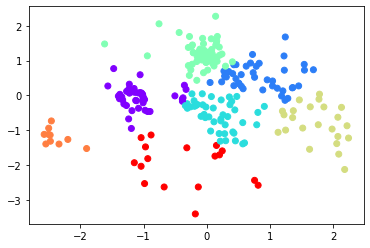

In [77]:
# Plot of our clusters
plt.scatter(new_df['longitude'],new_df['latitude'],c=new_df['cluster'],cmap='rainbow')

In [80]:
# Overlap our clusters
g02 = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['longitude'],df['latitude']))

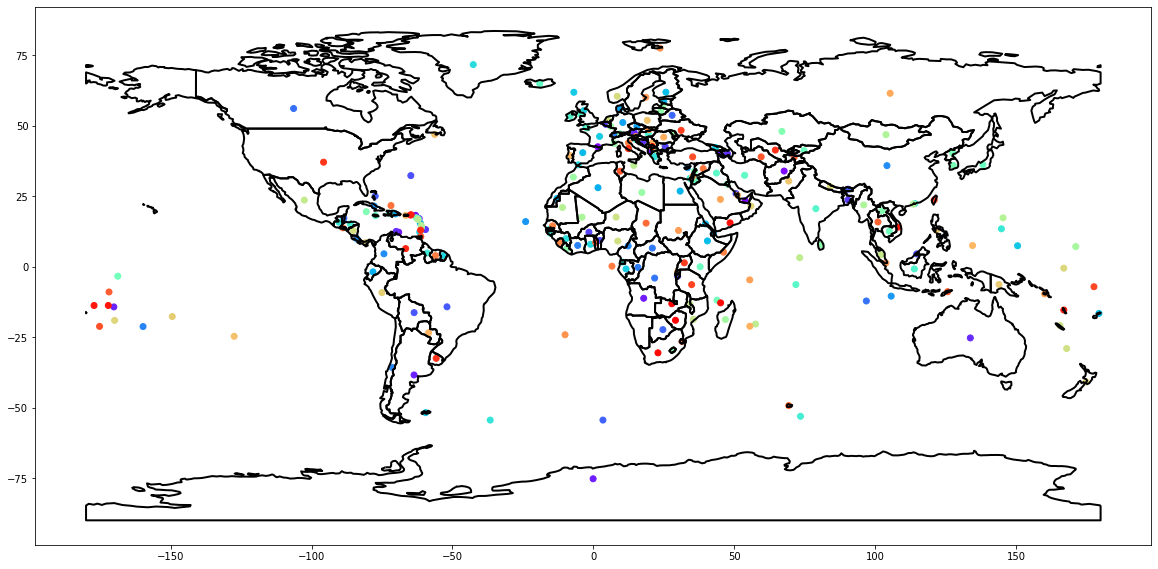

In [81]:
fig,ax = plt.subplots(figsize=(20,10))
g02.plot(cmap='rainbow',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [ ]:
### Task 2
+ Customer Segmentation

In [82]:
df_cust = pd.read_csv("jewellery.csv")

In [83]:
df_cust.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [84]:
# Dtypes
df.dtypes

country                 object
latitude               float64
longitude              float64
name                    object
cluster_continents       int32
geometry              geometry
cluster                  int32
dtype: object

In [85]:
# Descriptive Stat
df_cust.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


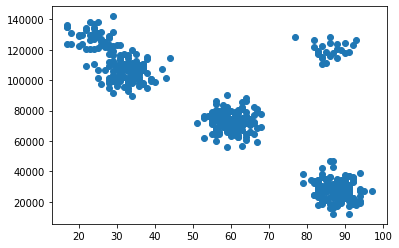

In [86]:
# Simple Plot
plt.scatter(df_cust['Age'],df_cust['Income'])


In [90]:
# Groups based on Age and Income
df_cust.groupby(['Age','Income']).size()


Age  Income
17   123828    1
     134734    1
     134966    1
     136255    1
18   123718    1
              ..
94   27771     1
     28352     1
     38923     1
95   27038     1
97   27271     1
Length: 505, dtype: int64

#### How to Find the Optimal K for the cluster
+ Elbow Method
+ Silhouette Method


#### How to choose the best k - number for your cluster
+ Elbow method
+ Silhoutte score
    - +1 : close to 1 means that datapoint is inside it own cluster
    - 0 : close to 0 means it is close to a cluster boundary
    - -1 : close to 1 means it is in a wrong cluster


In [92]:
# Elbow Method
# Use the sum of squared distance and find where there is a bent

sum_of_sqr_distance = []
k_range = range(1,15)
for k in k_range:
    km_model2 = KMeans(n_clusters=k)
    km_model2.fit(df_cust)
    sum_of_sqr_distance.append(km_model2.inertia_)

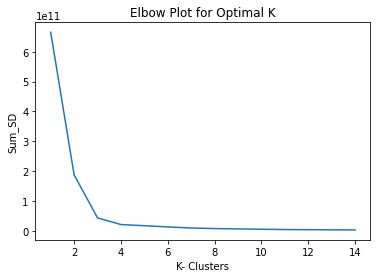

In [93]:
# Plot for Elbow Method
plt.plot(k_range,sum_of_sqr_distance)
plt.xlabel('K- Clusters')
plt.ylabel('Sum_SD')
plt.title("Elbow Plot for Optimal K")
plt.show()

In [95]:
from sklearn.metrics import silhouette_samples,silhouette_score

#### Using Silhouette Method for finding Optimal K


In [97]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km_models3 = KMeans(n_clusters=n_clusters)
    preds = km_models3.fit_predict(df_cust)
    centers = km_models3.cluster_centers_

    score = silhouette_score(df_cust, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6547312337772452)
For n_clusters = 3, silhouette score is 0.7393168523275077)
For n_clusters = 4, silhouette score is 0.7207226008574878)
For n_clusters = 5, silhouette score is 0.6777125614839151)
For n_clusters = 6, silhouette score is 0.6086085362621211)


In [100]:
# Init Model
km3 = KMeans(n_clusters=4)

In [101]:
# Fit Predict
y_pred = km3.fit_predict(df_cust)

In [102]:
y_pred

array([2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 3, 3, 3, 3, 2, 1, 2, 0, 0, 1, 3, 1,
       2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 3, 2, 0, 2, 3, 3, 2, 0, 1, 2,
       2, 1, 1, 1, 3, 2, 0, 3, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 1, 1, 2, 2, 3, 0, 0, 3, 2, 3, 2, 2, 1, 2, 3, 2, 0, 0, 3, 3, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 0, 0, 3, 3, 2,
       0, 3, 2, 3, 3, 3, 2, 3, 1, 0, 3, 0, 0, 0, 3, 1, 2, 0, 2, 2, 3, 2,
       3, 2, 1, 0, 1, 1, 2, 3, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 3, 0, 2,
       0, 3, 3, 2, 0, 2, 3, 0, 2, 3, 0, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 3, 1, 1, 0, 3, 2, 2, 2, 3, 0, 2, 2, 2, 0, 1, 3,
       0, 0, 0, 3, 2, 3, 2, 3, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 3, 1, 3, 0,
       2, 2, 3, 0, 1, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2, 2, 3, 2, 3, 3, 1, 2,
       2, 2, 1, 2, 3, 0, 1, 1, 1, 0, 2, 3, 0, 0, 3, 3, 2, 2, 1, 2, 2, 0,
       2, 0, 3, 1, 2, 3, 0, 2, 0, 0, 3, 2, 0, 0, 2, 2, 0, 3, 3, 1, 3, 0,
       0, 3, 1, 0, 0, 1, 2, 3, 3, 2, 3, 0, 0, 3, 2,

In [103]:
# Centroid/Cluster Centers
km3.cluster_centers_

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [4.08750000e+01, 1.26031667e+05, 6.54598429e-01, 7.28792610e+03],
       [5.99615385e+01, 7.23328462e+04, 7.71295985e-01, 6.89089329e+03],
       [3.54230769e+01, 1.05228392e+05, 3.02152694e-01, 1.49378365e+04]])

In [104]:
df_cust.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [105]:
df_cust['clusters'] = y_pred

In [106]:
df_cust.head()

,Age,Income,SpendingScore,Savings,clusters
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,0


### Plotting the Clusters

In [107]:
df_cust['clusters'].unique()

array([2, 0, 1, 3], dtype=int32)

In [108]:
df0 = df_cust[df_cust['clusters'] == 0]
df01 = df_cust[df_cust['clusters'] == 1]
df02 = df_cust[df_cust['clusters'] == 2]
df03 = df_cust[df_cust['clusters'] == 3]

Text(0, 0.5, 'Cluster')

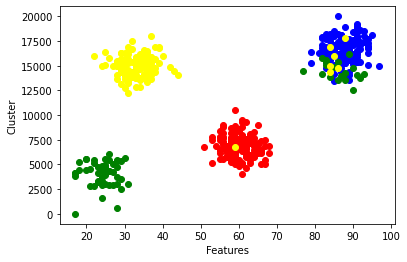

In [110]:
# Scatter Plot  of Clusters
plt.scatter(df0['Age'],df0['Savings'],color='blue')
plt.scatter(df01['Age'],df01['Savings'],color='green')
plt.scatter(df02['Age'],df02['Savings'],color='red')
plt.scatter(df03['Age'],df03['Savings'],color='yellow')
plt.xlabel('Features')
plt.ylabel('Cluster')

In [111]:
km3.cluster_centers_

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [4.08750000e+01, 1.26031667e+05, 6.54598429e-01, 7.28792610e+03],
       [5.99615385e+01, 7.23328462e+04, 7.71295985e-01, 6.89089329e+03],
       [3.54230769e+01, 1.05228392e+05, 3.02152694e-01, 1.49378365e+04]])

#### Scatter Plot with Centroids

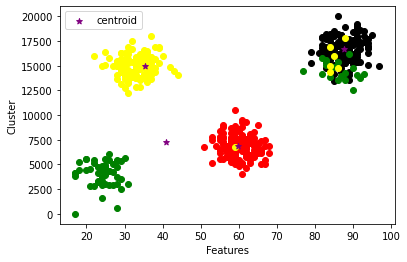

In [113]:
plt.scatter(df0['Age'],df0['Savings'],color='black')
plt.scatter(df01['Age'],df01['Savings'],color='green')
plt.scatter(df02['Age'],df02['Savings'],color='red')
plt.scatter(df03['Age'],df03['Savings'],color='yellow')
plt.scatter(km3.cluster_centers_
           [:,0],km3.
            cluster_centers_[:,3],
           color='purple',marker='*',
           label='centroid')

plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()

#### Using Silhouette Plot
+ The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [114]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_plot(X, y, n_clusters, ax=None):
	if ax is None:
		ax = plt.gca()
		# Compute the silhouette scores for each sample
		silhouette_avg = silhouette_score(X, y)
		sample_silhouette_values = silhouette_samples(X, y)
		y_lower = padding = 2
		for i in range(n_clusters):
	# Aggregate the silhouette scores for samples belonging to
			ith_cluster_silhouette_values = sample_silhouette_values[y == i]
			ith_cluster_silhouette_values.sort()
			size_cluster_i = ith_cluster_silhouette_values.shape[0]
			y_upper = y_lower + size_cluster_i
			color = cm.nipy_spectral(float(i) / n_clusters)
			ax.fill_betweenx(np.arange(y_lower, y_upper),
							0,ith_cluster_silhouette_values,
							facecolor=color,
							edgecolor=color,
							alpha=0.7)
			# Label the silhouette plots with their cluster numbers at the middle
			ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
			# Compute the new y_lower for next plot
			y_lower = y_upper + padding
		ax.set_xlabel("The silhouette coefficient values")
		ax.set_ylabel("Cluster label")
		# The vertical line for average silhoutte score of all the values
		ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
		ax.annotate('Average',
					xytext=(silhouette_avg, y_lower * 1.025),
					xy=(0, 0),
					ha='center',
					alpha=0.8,
					c='r')
		ax.set_yticks([]) # Clear the yaxis labels / ticks
		ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
		ax.set_ylim(0, y_upper + 1)
		ax.set_xlim(-0.075, 1.0)
		return ax

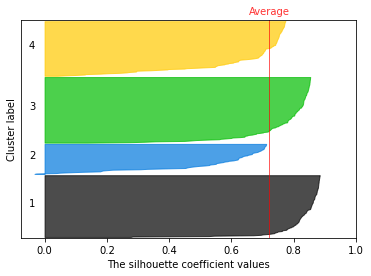

In [115]:
### Silhoutte Plot
silhouette_plot(df_cust,y_pred,4,ax=None)

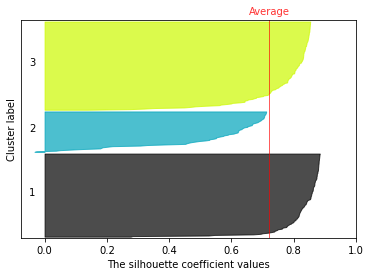

In [116]:
### Silhoutte Plot
silhouette_plot(df_cust,y_pred,3,ax=None)

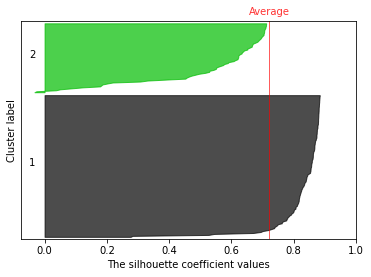

In [117]:
### Silhoutte Plot
silhouette_plot(df_cust,y_pred,2,ax=None)

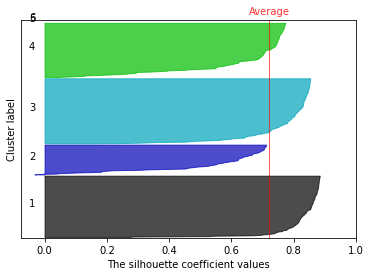

In [118]:
### Silhoutte Plot
silhouette_plot(df_cust,y_pred,6,ax=None)

+ DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise
+ It refers to an unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.(kdnuggets)
+ 

+ DBSCAN is a base algorithm for density-based clustering. 
+ It can discover clusters of different shapes and sizes from a large amount of data

#### Usefulness
+ Unsupervised ML
+ Outlier Detection
+ Noise detection


#### Terms
The DBSCAN algorithm uses two parameters:
+ eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

+ minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
    - minPt >= Dimensions of dataset + 1

+ Core point — This is a point that has at least m points within distance n from itself.
+ Border — This is a point that has at least one Core point at a distance n.
+ Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.







![](dbscan_graph.png)

![](dbscan_terms.png)

#### Scaling Dataset
+ StandardScaler
+ MinMaxScaler

In [119]:
df = pd.read_csv("jewellery.csv")

In [120]:
df.shape

(505, 4)

In [121]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [122]:
# Scale our data
from sklearn.preprocessing import StandardScaler

In [123]:
X = StandardScaler().fit_transform(df)

In [124]:
X

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

In [125]:
# Init Model
from sklearn.cluster import DBSCAN

In [127]:
dbscan = DBSCAN(eps=0.3,min_samples=10)

In [128]:
# Fit Model
y_cluster_dbs = dbscan.fit_predict(X)

In [129]:
y_cluster_dbs

array([ 0,  0,  0,  0,  1,  4,  0,  1,  1,  1, -1,  2,  2,  2,  0,  3,  0,
        1,  1,  3,  2,  3,  0,  1, -1,  4, -1,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1,  4,  0,  0,  4,  3,  4,  2,  0,  1,
        2,  4,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1, -1,
        4,  0,  0,  2,  1,  1,  2,  0,  2,  0,  0,  4,  0, -1,  0,  1,  1,
        2,  2,  0,  0,  0,  0,  0,  4,  1,  0,  4,  2,  0,  0,  2,  2,  4,
        2,  4,  2,  1, -1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2, -1,
        1,  2,  1,  1,  1,  2,  3,  0,  1,  0,  0,  2,  0,  2,  0,  4,  1,
       -1,  4,  0,  2,  1,  0,  0,  4,  0,  4,  0, -1,  0,  1,  0,  2,  1,
        0,  1,  3,  2,  0,  1,  0,  2,  1,  0,  2, -1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2,  4,  4,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1, -1,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  4,  0,  1,  1, -1,  1,  0,  1,  2,  4,  2,  1,  0,
        0,  2,  1,  2,  4

In [130]:
#  Number of Unique Clusters
set(y_cluster_dbs)

{-1, 0, 1, 2, 3, 4}

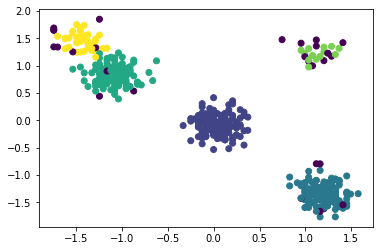

In [131]:
# Non Spherical Data
plt.scatter(X[:,0],X[:,1],c=y_cluster_dbs)

In [133]:
# Number of cluster
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [134]:
n_clusters_

5

In [135]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)

In [136]:
n_noise

30

### Clustering using BIRCH

+ BIRCH stands for Balanced Iterative Reducing and Clustering using Hierarchies
+ It is a hierarchical clustering algorithm. 
+ It provides a memory-efficient clustering method for large datasets.
+ Very good for large dataset
+ Clustering is conducted without scanning all points in a dataset. 
+ The BIRCH algorithm creates Clustering Features (CF) Tree for a given dataset and CF contains the number of sub-clusters that holds only a necessary part of the data. Thus the method does not require to memorize the entire dataset.


#### Terms
+  branching_factor: it defines the number of sub-clusters and 
+ threshold: it sets the limit between the sample and sub-cluster.


#### Benefit
+ Useful for large dataset
+ BIRCH can work with any given amount of memory, and the I/O complexity is a little more than one scan of data.

In [157]:
from sklearn.cluster import Birch

In [158]:
birch_model = Birch(branching_factor=100,threshold=0.5,n_clusters=4)
birch_model.fit(df)

Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=4,
      threshold=0.5)

In [159]:
y_clus_bch = birch_model.predict(df)

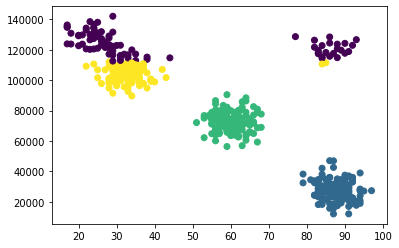

In [160]:
plt.scatter(df['Age'],df['Income'],c=birch_model.labels_)

### Clustering using Hierarchical Clustering
+ Hierarchical Clustering: the process of building a hierarchy or ordering of clusters till only one cluster is left
    
#### Types of Hierarchical Clustering
+ Additive(Agglomerative) hierarchical clustering
    - Agglomerate (merge or join)
    - Assign each point to a cluster
    - Merge/Join closes pairs of clusters into one
    - Repeat until you have a single cluster
    - You keep on adding or joining clusters 

+ Divisive hierarchical clustering
    - Opposite of Additive
    - Start with a single large cluster
    - Divide/Split the farthest point in the cluster
    - Repeat until each cluster only contains a single data point
    
    
#### Terms
+ Similarity Distance
+ Proximity Matrix: it stores the distances between each point
+ Dendogram: used to find the number of clusters
    - A dendrogram is a tree-like diagram that records the sequences of merges or splits.
    - The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

#### Agglomerative Hierarchical Clustering
+ Merging clusters
+ Dendogram to detect n_clusters to use and end at

In [137]:
# Load Dataset
df = pd.read_csv("jewellery.csv")

In [138]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [139]:
# Normalization
from sklearn.preprocessing import normalize

In [153]:
# Scale/Normal
df_scaled = normalize(df)

In [154]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

In [143]:
df_scaled

,Age,Income,SpendingScore,Savings
0,0.000743,0.996461,0.000010,0.084052
1,0.000720,0.997814,0.000010,0.066087
2,0.000823,0.992416,0.000009,0.122925
3,0.000789,0.995157,0.000010,0.098298
4,0.003552,0.725046,0.000014,0.688692
...,...,...,...,...
500,0.000274,0.989284,0.000004,0.146006
501,0.003465,0.742750,0.000008,0.669559
502,0.002320,0.909904,0.000009,0.414812
503,0.003287,0.747083,0.000013,0.664723


In [144]:
# Detecting Number of Clusters sing Dendogram
import scipy.cluster.hierarchy as shc

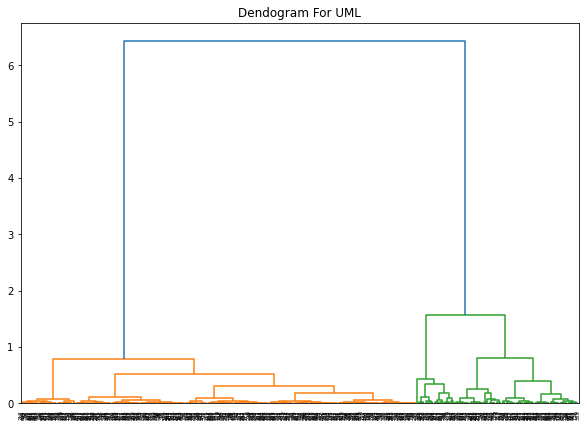

In [145]:
plt.figure(figsize=(10,7))
plt.title("Dendogram For UML")
dend = shc.dendrogram(shc.linkage(df_scaled,method='ward'))

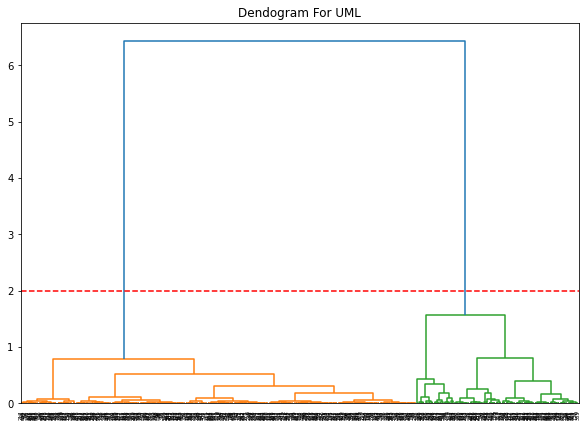

In [146]:
plt.figure(figsize=(10,7))
plt.title("Dendogram For UML")
dend = shc.dendrogram(shc.linkage(df_scaled,method='ward'))
plt.axhline(y=2,color='r',linestyle='--')

In [147]:
# model building
from sklearn.cluster import AgglomerativeClustering

In [148]:
hcluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')


In [149]:
y_clust_hcl = hcluster.fit_predict(df_scaled)

In [150]:
y_clust_hcl

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [155]:
df_scaled['clusters'] = y_clust_hcl

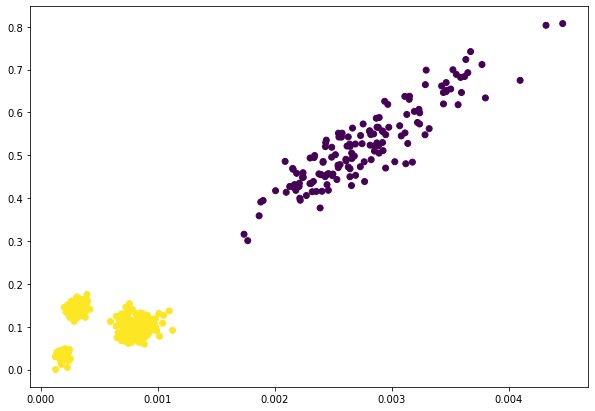

In [156]:
# Plot
plt.figure(figsize=(10,7))
plt.scatter(df_scaled['Age'],df_scaled['Savings'],c=df_scaled['clusters'])

In [40]:
#### Thanks For Watching
### Jesus Saves @JCharisTech
### By Jesse E.Agbe(JCharis)